0.459
0.45352523887391194
0.4534
0.45352523887391194


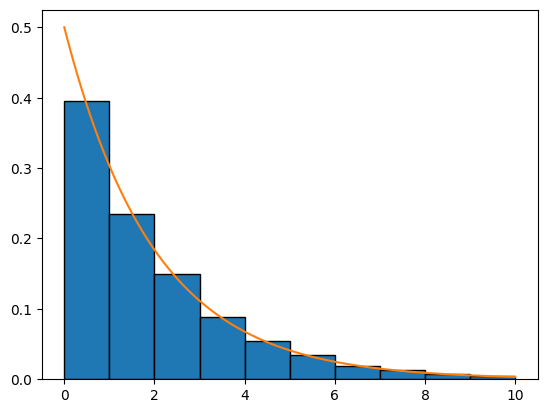

In [14]:
import random

"""
Exemplu practic 1

Timpul de întârziere în minute al unui student la un examen este o variabilă aleatoare 
exponențială cu media 2 minute, adică  Exp(1/2). Indepentă de T, nota obținută de student la examen
 are distribuția uniformă discretă, adică Unid(10). Profesorul scade un punct din nota studentului pentru
 fiecare minut întreg din timpul de întârziere al studentului (dacă se obține o notă mai mică decât 1,
 atunci profesorul consideră nota finală 1) . Fie  N nota finală a studentului.
 
 a) Simulați 10000 de valori pentru T, apoi afișați o histogramă a frecvențelor relative cu 
intervalul  [0, 10] și graficul funcției de densitate pe acest interval.
 b) Estimați  P(N ≥5) , apoi afișați probabilitatea teoretică
"""

from scipy.stats import expon, randint, uniform
from matplotlib.pyplot import hist, plot
from numpy import linspace, mean, floor

# a)
rata = 1/2

timpi = expon.rvs(scale=2, size=10000)

# 10 = nr bare, range =  de unde incepe
hist(timpi, 10, range=(0,10), density=True, edgecolor='k')
x = linspace(0,10,1000) # genereaza 1000 de puncte intre 0 si 10
plot(x, expon.pdf(x, scale=2)) # -> calculeaza valoarea fucntiei de densitate pentru fiecare 
                               # elem din x cu distributia exponentiala cu scale 2
# plot -> face graficul, pentru fiecare element din vectorul x, ii da valoarea calculata de expon                            #fct de densitate   

# b)

estimare = mean([randint.rvs(1,11) - floor(t) >= 5 for t in timpi])
prob_teoretica = sum(randint.pmf(k, 1, 11) * expon.cdf(k-4, scale=2) for k in range(5,11))

print(estimare)
print(prob_teoretica)


estimare_continua = mean([uniform.rvs(1,10) - floor(t) >= 5 for t in timpi])
teoretica_continua = sum(uniform.pdf(k, 1, 10) * expon.cdf(k-4, scale=2) for k in range(5,11))


print(estimare_continua)
print(teoretica_continua)


0.3239
0.32739814342327334


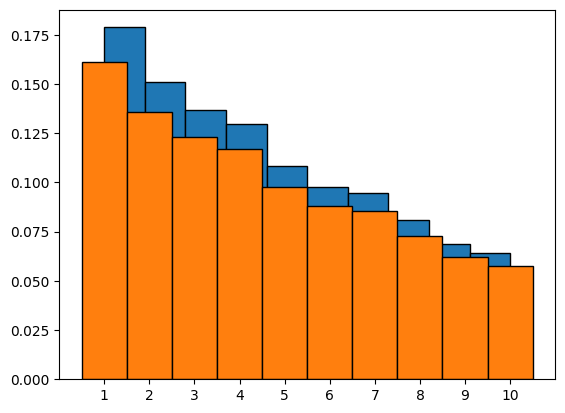

In [47]:
"""
Exemplu practic 2

 Dintr-o populație se alege aleator, cu returnare, câte o persoană până când se găsește o persoană cu
 înălțimea mai mare decât 1.90m.  Fie X numărul de persoane alese. Știind că înălțimea unei persoane
 alese aleator urmează distribuția normală cu media 1,65 și deviația standard 0, 20 m,
 a) generați 10000 de valori pentru X, apoi afișați o histogramă a frecvențelor relative pentru valorile:
 1, 2,…,10.
 b) Estimați P(X > 10), apoi afișați probabilitatea teoretică
"""

from scipy.stats import norm, geom
from matplotlib.pyplot import hist, xticks
from numpy import mean

#a)

media = 1.65
deviatia = 0.20

prob_succes = 1 - norm.cdf(1.90, loc=media, scale=deviatia)

oameni = geom.rvs(prob_succes, size=10000)
# in cate cazuri au fost mai mult de 11 oameni alesi ca sa gaseasca unul cu 1.90

# bins = nr bare
# bin_edges = interval 

bin_edges = [k + 0.5 for k in range(0,11)]
hist(oameni, bins=10,range=(1,10), density=True, edgecolor='k') #!!!!!
hist(oameni, bin_edges, density=True, edgecolor='k')
#xticks(range(1,11))


#b)

estimat = mean(oameni > 10)
teoretic = 1 - geom.cdf(10, prob_succes)

print(estimat)
print(teoretic)


-0.05407178312712943
7.6543211166290295
0.275 0.2763263901682369


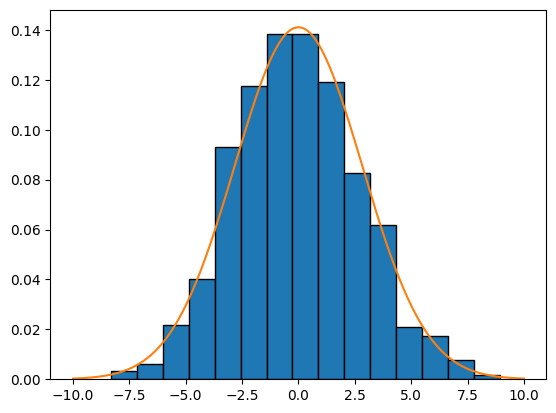

In [84]:
#225_1

from numpy import var, sqrt

media_x = -1
deviatia_x = 2

media_y = 1
deviatia_y = 2


# N(media, varianta) -> radicalllll!!

val_x = norm.rvs(loc=-1, scale=2, size=1000)
val_y = norm.rvs(loc=1, scale=2, size=1000)


hist(val_x + val_y, bins=15, density=True, edgecolor='k')
x= linspace(-10,10, 1000)
plot(x, norm.pdf(x, loc=0, scale=sqrt(8)))



# a)

print(mean(val_x+val_y))
print(var(val_x+val_y))

# b)

estimata = mean(abs(val_x+val_y) < 1)
teoretica = norm.cdf(1, loc=0, scale=sqrt(8)) - norm.cdf(-1, loc=0, scale=sqrt(8))
print(estimata, teoretica)


0.818
0.8185946141203637


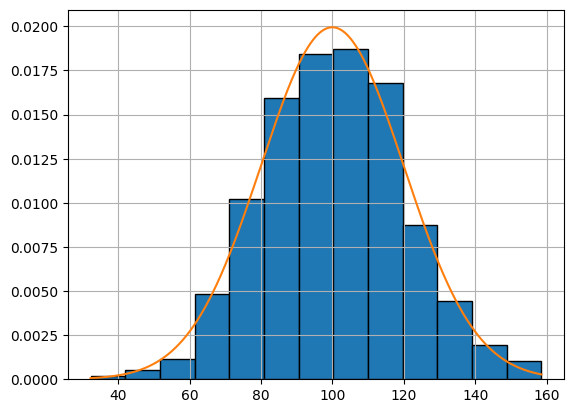

In [92]:
#226_2

from matplotlib.pyplot import  show, grid

media = 100
deviatia = 20

valori = norm.rvs(loc=media, scale=deviatia, size=1000)

#a)

val = [x for x in valori if 80 < x < 140 ]

prob = len(val)/1000
print(prob)

#b)

prob_teor = norm.cdf(140, loc=100, scale=20) - norm.cdf(80, loc=100, scale=20)
print(prob_teor)

#c)

hist(valori, bins=13, density=True, edgecolor='k')
x = linspace(min(valori), max(valori),1000)
plot(x, norm.pdf(x, loc=100, scale=20))
grid()
show()



In [100]:
# R1_2

s1medie = 1
s1scale = 1

s2medie = 2

prob_te = norm.cdf(1.5, loc = 1, scale = 1)
print(prob_te)

valorii = []

for _ in range(1000):
    y = norm.rvs(loc=1, scale=1)
    t1 = abs(y)
    if t1 > 2:
        t2 = expon.rvs(scale=2)
        valorii.append(t2 + 2)
    else:
        valorii.append(t1)
        
print(mean(valorii))

vall = [x for x in valorii if x < 4]
print(len(vall)/1000)



0.6914624612740131
1.4783269959713021
0.932


In [110]:
#R2_1
import numpy

# a)

prob = (3+4)/10
print(prob)

# b)

v = [1,2,3,4]
p = [1/10, 2/10, 3/10, 4/10]

timpi = []

for _ in range(1000):
    var = numpy.random.choice(v,p=p)
    timp = expon.rvs(scale=v[var-1])
    timpi.append(timp)
    
print(mean(timpi)) 

#c)

esti = [x for x in timpi if x >= 3]
print(len(esti)/1000)



0.7
3.004176016858379
0.355


In [129]:
from math import perm
from scipy.stats import hypergeom

# R4_1

rosii = 10
albe = 3
verzi = 5
urna = ["rosu"] * 10 + ["alb"] * 3 + ["verde"] * 5

# cu returnare


ctr1 = 0
ctr2 = 0
ctr3 = 0

for _ in range(1000):
    bila1, bila2, bila3 = numpy.random.choice(urna, size=3, replace=True)
    if bila1 == "alb" and bila2 == "rosu" and bila3 == "verde":
        ctr1 += 1
    if bila1 != "verde" and bila2 != "verde" and bila3 != "verde":  
        ctr2 += 1
    bile = [bila1, bila2, bila3]
    if bile.count("verde") == 1:
        ctr3 += 1
    
print(ctr1 / 1000)    
print(ctr2 / 1000)
print(ctr3 / 1000)


# fara returnare

p = 10/18*3/18*5/18 
print(p)

pb = hypergeom.pmf(0,18,5,3)
print(pb)

pc = hypergeom.pmf(1,18,5,3)
print(pc)


0.029
0.364
0.443
0.025720164609053502
0.3504901960784314
0.47794117647058826


In [133]:
#R1_1
from scipy.stats import uniform

media = 4
low = 1
high = 3

prob = expon.cdf(3, scale=4)

print(prob)

val = []

for _ in range(1000):
    t1 = expon.rvs(scale=4)
    if t1 >= 4 :
        t2 = uniform.rvs(loc=low, scale=high-low) + 4
        val.append(t2)
    else:
        val.append(t1)
        
print(mean(val))

vall = [x for x in val if x <= 4]
print(len(vall)/1000)



0.5276334472589853
3.1690506899454163
0.644
